# Preprocessing & Descriptive Analysis of Dataset

# Import Libraries

In [1]:
# These libraries cover data loading, cleaning, visualization, and scaling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize

# Data Loading

In [2]:
# Load the Polish Companies Bankruptcy dataset (1 year)
data, meta = arff.loadarff("1year.arff")


# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Convert the target variable from bytes to integer (0 = non-bankrupt, 1 = bankrupt)
df["class"] = (
    df["class"]
    .astype(str)
    .str.replace("b'", "", regex=False)
    .str.replace("'", "", regex=False)
    .astype(int)
)

df.head()

# Each observation represents a company in bankruptcy or survival.
# The target variable is binary, making this a binary classification problem.

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


# Renaming of Attributes to their Respective Financial Ratios

In [3]:
# Original attributes are labeled Attr1–Attr64.
# For interpretability, we rename them using their financial ratio definitions.
attr_rename = {
    "Attr1": "ROA_net_profit_total_assets",
    "Attr2": "Total_liabilities_total_assets",
    "Attr3": "Working_capital_total_assets",
    "Attr4": "Current_assets_short_term_liabilities",
    "Attr5": "Cash_flow_adequacy_ratio",
    "Attr6": "Retained_earnings_total_assets",
    "Attr7": "EBIT_total_assets",
    "Attr8": "Equity_book_value_total_liabilities",
    "Attr9": "Sales_total_assets",
    "Attr10": "Equity_total_assets",
    "Attr11": "Gross_profit_extra_items_fin_exp_total_assets",
    "Attr12": "Gross_profit_short_term_liabilities",
    "Attr13": "Gross_profit_depreciation_sales",
    "Attr14": "Gross_profit_interest_total_assets",
    "Attr15": "Liabilities_turnover_days",
    "Attr16": "Gross_profit_depreciation_total_liabilities",
    "Attr17": "Total_assets_total_liabilities",
    "Attr18": "Gross_profit_total_assets",
    "Attr19": "Gross_profit_sales",
    "Attr20": "Inventory_turnover_days",
    "Attr21": "Sales_growth_rate",
    "Attr22": "Operating_profit_total_assets",
    "Attr23": "Net_profit_sales",
    "Attr24": "Gross_profit_3y_avg_total_assets",
    "Attr25": "Equity_minus_share_capital_total_assets",
    "Attr26": "Cash_flow_total_liabilities",
    "Attr27": "Operating_profit_financial_expenses",
    "Attr28": "Working_capital_fixed_assets",
    "Attr29": "Log_total_assets",
    "Attr30": "Liabilities_excl_cash_sales",
    "Attr31": "Gross_profit_interest_sales",
    "Attr32": "Current_liabilities_turnover_days",
    "Attr33": "Operating_expenses_short_term_liabilities",
    "Attr34": "Operating_expenses_total_liabilities",
    "Attr35": "Profit_on_sales_total_assets",
    "Attr36": "Sales_total_assets_alt",
    "Attr37": "Quick_assets_long_term_liabilities",
    "Attr38": "Constant_capital_total_assets",
    "Attr39": "Profit_on_sales_sales",
    "Attr40": "Cash_ratio",
    "Attr41": "Debt_repayment_period",
    "Attr42": "Operating_profit_sales",
    "Attr43": "Receivables_inventory_turnover_days",
    "Attr44": "Receivables_turnover_days",
    "Attr45": "Net_profit_inventory",
    "Attr46": "Quick_ratio",
    "Attr47": "Inventory_turnover_days_COGS",
    "Attr48": "EBITDA_total_assets",
    "Attr49": "EBITDA_sales",
    "Attr50": "Current_assets_total_liabilities",
    "Attr51": "Short_term_liabilities_total_assets",
    "Attr52": "Short_term_liabilities_turnover_days",
    "Attr53": "Equity_fixed_assets",
    "Attr54": "Constant_capital_fixed_assets",
    "Attr55": "Working_capital",
    "Attr56": "Gross_margin",
    "Attr57": "Liquidity_efficiency_ratio",
    "Attr58": "Total_costs_total_sales",
    "Attr59": "Long_term_liabilities_equity",
    "Attr60": "Sales_inventory",
    "Attr61": "Sales_receivables",
    "Attr62": "Short_term_liabilities_sales_days",
    "Attr63": "Sales_short_term_liabilities",
    "Attr64": "Sales_fixed_assets"
}

df = df.rename(columns=attr_rename)
df.columns[:10]

Index(['ROA_net_profit_total_assets', 'Total_liabilities_total_assets',
       'Working_capital_total_assets', 'Current_assets_short_term_liabilities',
       'Cash_flow_adequacy_ratio', 'Retained_earnings_total_assets',
       'EBIT_total_assets', 'Equity_book_value_total_liabilities',
       'Sales_total_assets', 'Equity_total_assets'],
      dtype='object')

# Initial Dataset Inspection

In [4]:
# Dataset dimensions
print("Dataset shape (rows, columns):", df.shape)

# Data types
print("\nData types:")
print(df.dtypes.value_counts())

# Check for duplicate observations
print("\nNumber of duplicated rows:", df.duplicated().sum())

Dataset shape (rows, columns): (7027, 65)

Data types:
float64    64
int64       1
Name: count, dtype: int64

Number of duplicated rows: 82


In [5]:
# Distribution of the target variable (class imbalance check - see that it is very imbalanced)
class_counts = df["class"].value_counts()
class_perc = df["class"].value_counts(normalize=True) * 100

pd.DataFrame({
    "Count": class_counts,
    "Percentage": class_perc.round(2)
})

,Count,Percentage
class,,
0,6756,96.14
1,271,3.86


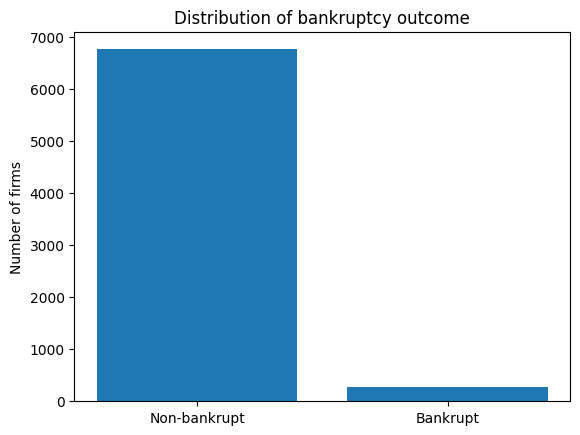

In [6]:
# Visual representation of class imbalance
plt.figure()
plt.bar(["Non-bankrupt", "Bankrupt"], class_counts.values)
plt.ylabel("Number of firms")
plt.title("Distribution of bankruptcy outcome")
plt.show()
# Bankruptcy prediction is a highly imbalanced classification problem, which must be acknowledged before modeling.

# Missing Values Analysis

In [7]:
# Count missing values per variable
missing_count = df.isna().sum()

# Percentage of missing values per variable
missing_pct = (missing_count / len(df)) * 100

missing_table = pd.DataFrame({
    "Missing values": missing_count,
    "Missing (%)": missing_pct.round(2)
})

# Focus only on variables with missing values
missing_table = missing_table[missing_table["Missing values"] > 0]
missing_table.sort_values("Missing (%)", ascending=False)

,Missing values,Missing (%)
Quick_assets_long_term_liabilities,2740,38.99
Sales_growth_rate,1622,23.08
Operating_profit_financial_expenses,311,4.43
Sales_inventory,135,1.92
Net_profit_inventory,134,1.91
Gross_profit_3y_avg_total_assets,124,1.76
Debt_repayment_period,84,1.20
Gross_profit_extra_items_fin_exp_total_assets,39,0.56
Current_liabilities_turnover_days,38,0.54
Constant_capital_fixed_assets,34,0.48


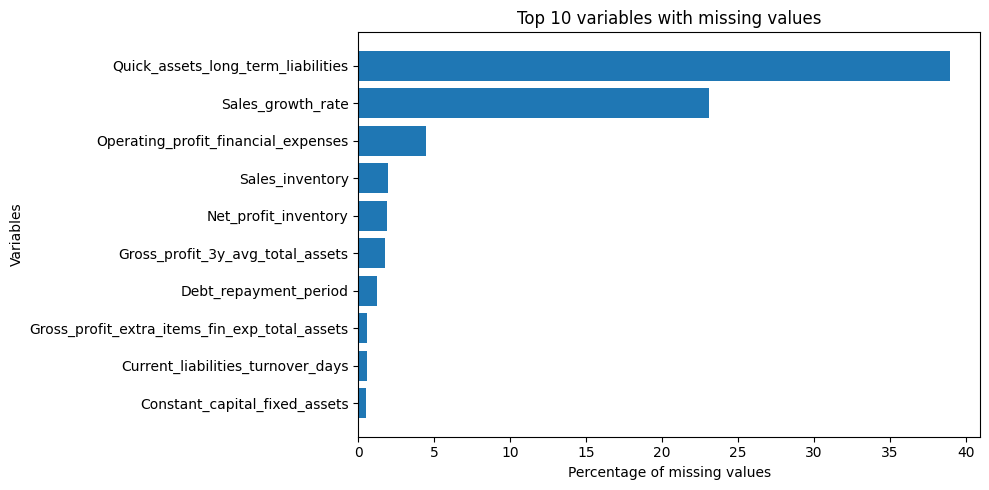

In [8]:
# Visualization of top variables with missing values
missing_sorted = missing_table.sort_values("Missing (%)", ascending=False).head(10) # sort in descending order

plt.figure(figsize=(10, 5))
plt.barh(missing_sorted.index, missing_sorted["Missing (%)"])

plt.xlabel("Percentage of missing values")
plt.ylabel("Variables")
plt.title("Top 10 variables with missing values")

plt.gca().invert_yaxis()   # puts the largest on top
plt.tight_layout()
plt.show()

# Missing Values Imputation

In [9]:
# Delete variables that have a high percentage of missing values
threshold = 20

vars_to_drop = missing_table[
    missing_table["Missing (%)"] > threshold
].index.tolist()

df = df.drop(columns=vars_to_drop)

# Median imputation (rest of variables) is used for robustness against extreme values
df_imputed = df.copy()

for col in df_imputed.columns:
    if col != "class":
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].median())

# Verify that no missing values remain
df_imputed.isna().sum().sum()

np.int64(0)

# Descriptive Statistical Analysis

In [10]:
# Print statistical analysis of the variables of the dataset, analyze dispersion

desc_stats = df_imputed.drop(columns=["class"]).describe().T
desc_stats[["mean", "std", "min", "25%", "50%", "75%", "max"]]

,mean,std,min,25%,50%,75%,max
ROA_net_profit_total_assets,0.034677,4.564530,-2.568900e+02,0.021208,0.075802,0.16024,94.28
Total_liabilities_total_assets,0.560182,5.348941,-7.216200e+01,0.296760,0.482960,0.68017,441.50
Working_capital_total_assets,0.119995,5.274333,-4.405000e+02,0.027011,0.181275,0.36250,1.00
Current_assets_short_term_liabilities,2.624331,13.229226,0.000000e+00,1.064100,1.502000,2.45225,1017.80
Cash_flow_adequacy_ratio,-262.873758,37053.484371,-2.722100e+06,-44.430500,-5.373900,37.69500,990900.00
...,...,...,...,...,...,...,...
Sales_inventory,424.759473,25875.850416,4.700000e-05,6.013050,10.040500,19.82050,2137800.00
Sales_receivables,15.615276,261.145162,1.600000e-05,4.834250,7.033700,10.68700,21110.00
Short_term_liabilities_sales_days,4763.201955,310783.483587,0.000000e+00,43.222500,68.509000,106.33500,25016000.00
Sales_short_term_liabilities,8.114797,19.954532,1.500000e-05,3.432500,5.303200,8.32680,1042.20


# Outlier Inspection

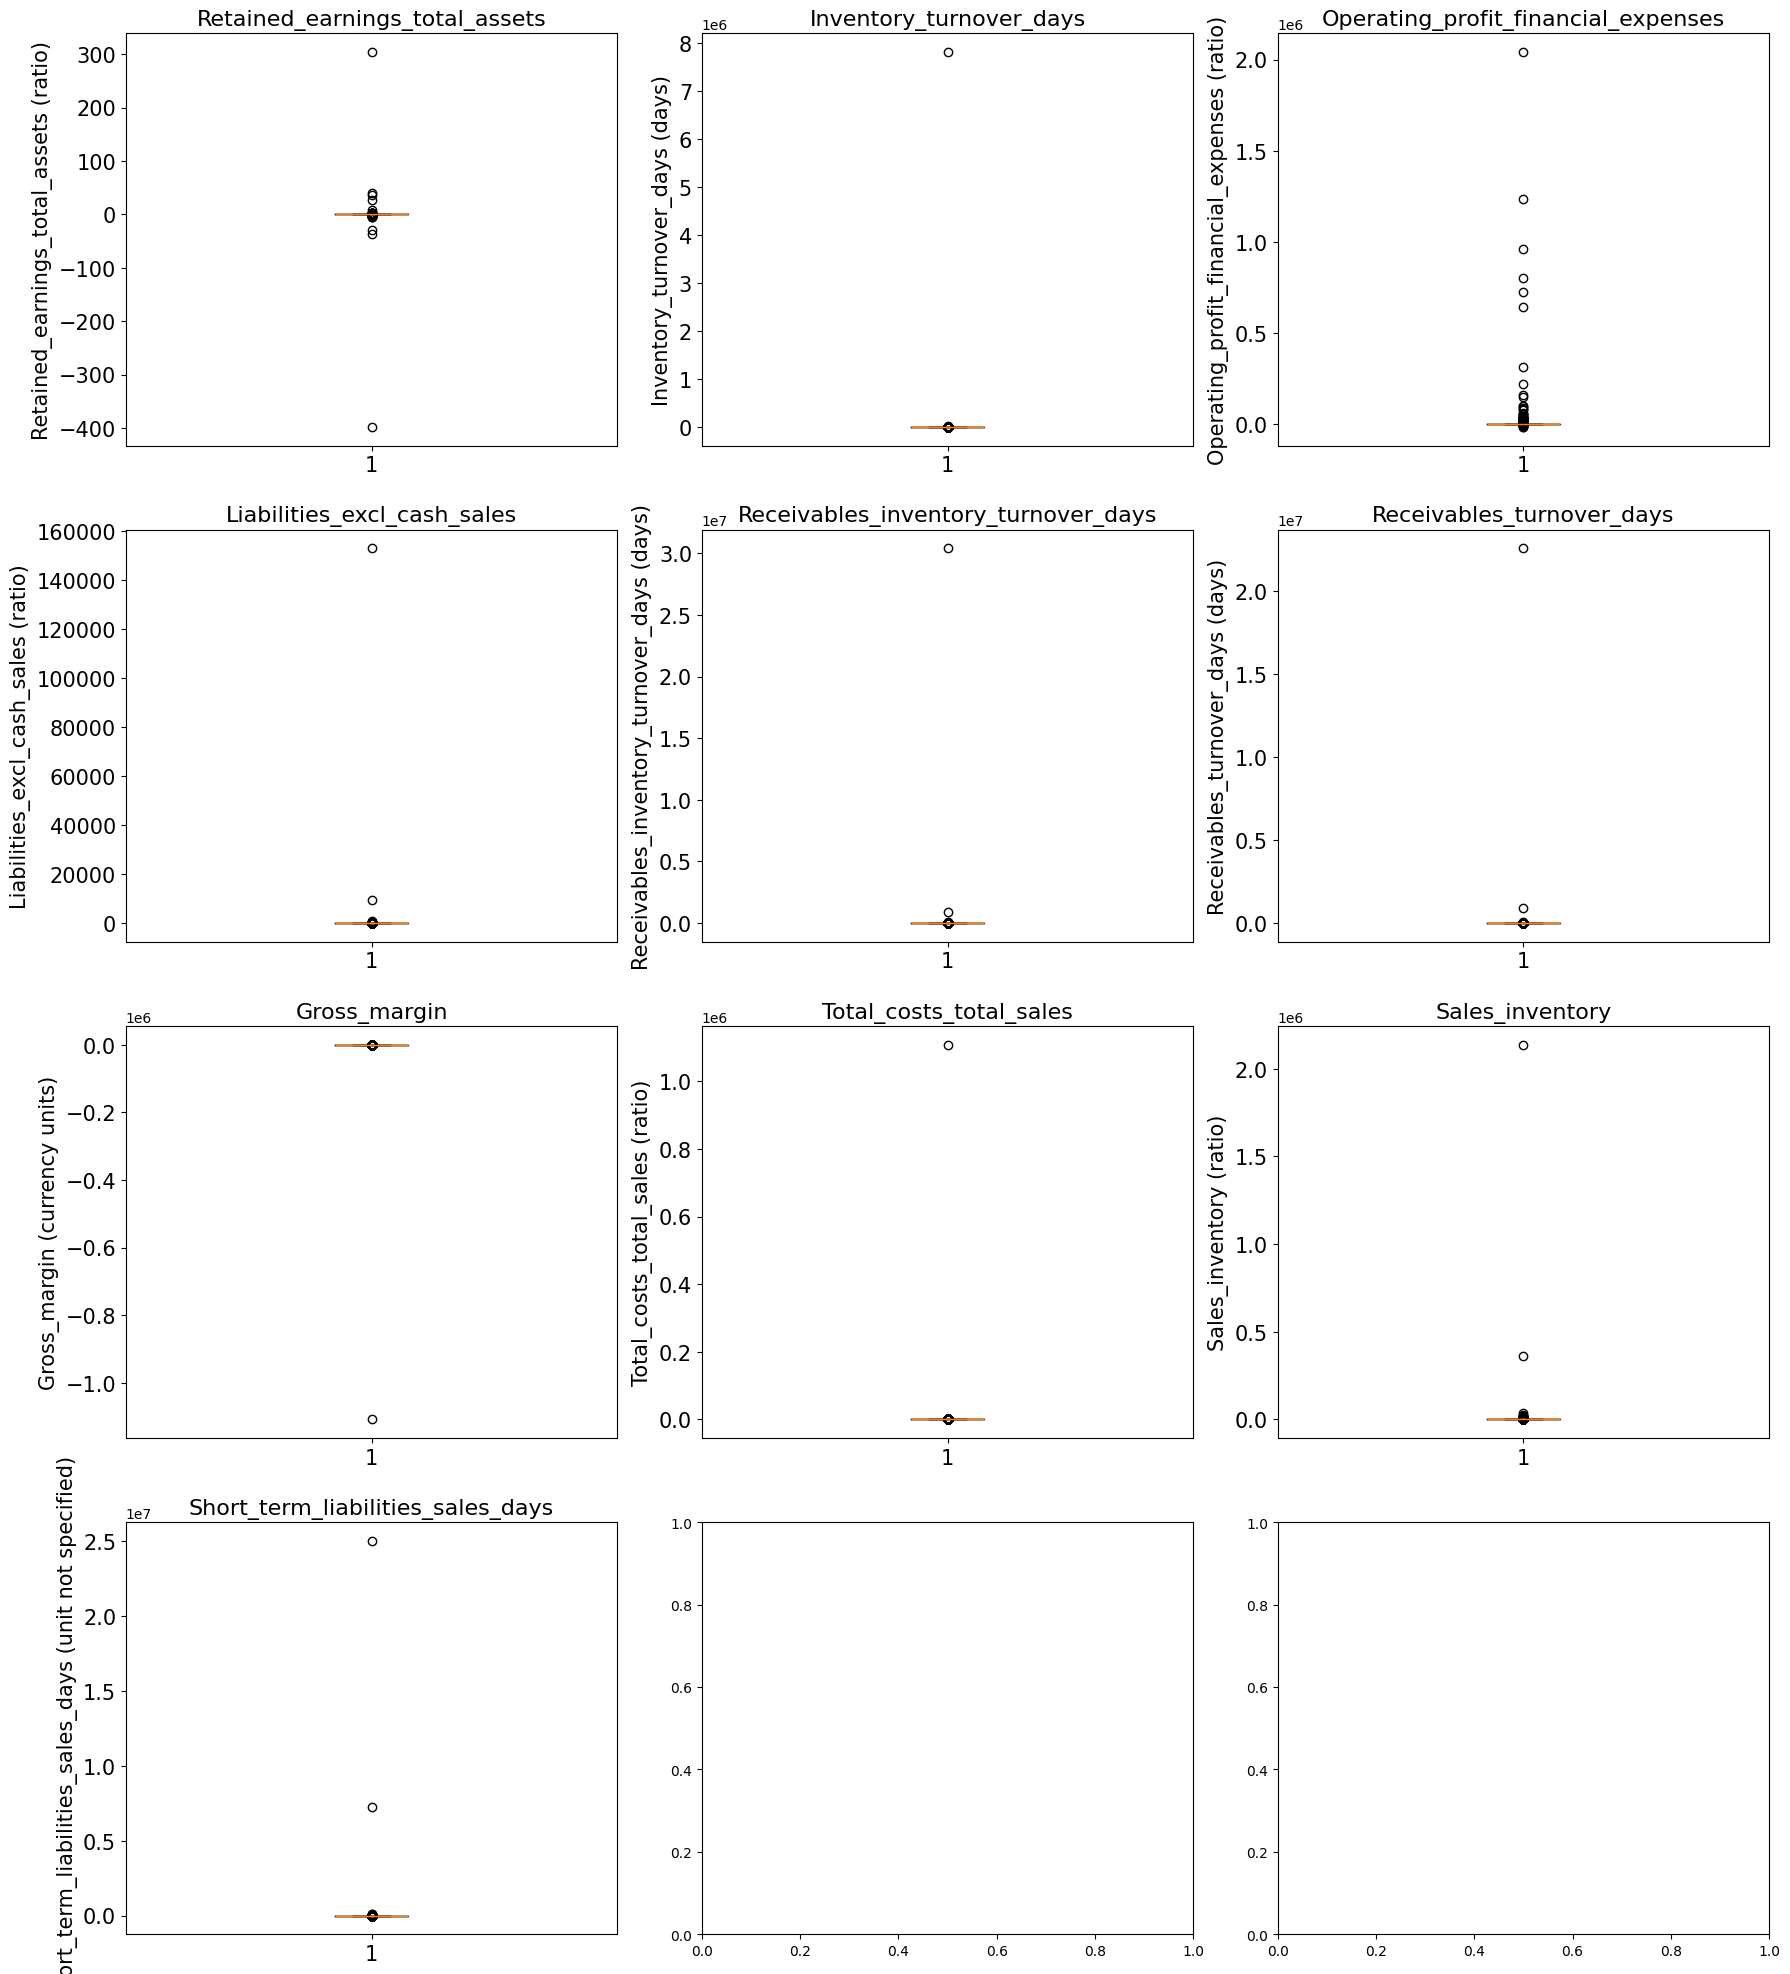

In [13]:
# In the analysis some variables had extremes, analyze more profoundly outliers with boxplots

import math

stats = desc_stats.copy()

# VERY strict rule: extreme results relative to central values
stats["flag_strong_outlier"] = (
    (stats["max"] > 100000 * stats["75%"]) |                 # huge right tail
    (stats["std"] > 100000 * (stats["50%"].abs() + 1e-6))    # huge dispersion
)

vars_out = stats[stats["flag_strong_outlier"]].index.tolist()

# Units dictionary
units = {
    # Monetary
    "Gross_margin": "currency units",

    # Days
    "Receivables_inventory_turnover_days": "days",
    "Inventory_turnover_days": "days",
    "Receivables_turnover_days": "days",
    "Short_term_liabilities_salesr_days": "days",

    # Ratios
    "Retained_earnings_total_assets": "ratio",
    "Operating_profit_financial_expenses": "ratio",
    "Liabilities_excl_cash_sales": "ratio",
    "Total_costs_total_sales": "ratio",
    "Sales_inventory": "ratio",

}

def y_label(var):
    unit = units.get(var, "unit not specified")
    return f"{var} ({unit})"

# Plotting boxplots before any transformation
ncols = 3
nvars = len(vars_out)
nrows = math.ceil(nvars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(vars_out):
    ax = axes[i]

    data = (
        df_imputed[col]
        .replace([np.inf, -np.inf], np.nan)
        .dropna()
    )

    ax.boxplot(data, showfliers=True)
    ax.set_title(col, fontsize=16)
    ax.set_ylabel(y_label(col), fontsize=15)
    ax.tick_params(axis="both", labelsize=15)

plt.tight_layout()
plt.show()

In [14]:
# No observations were removed to preserve bankruptcy-related information.
# Winsorize variables (1%–99%) to cap extreme numerical values that add noise but little economic information (variables printed in the boxplots)

for col in vars_out:
    df_imputed[col] = winsorize(df_imputed[col], limits=[0.01, 0.01])


In [15]:
# Check our transformations
desc_after = df_imputed.drop(columns=["class"]).describe().T
desc_after[["mean", "std", "min", "25%", "50%", "75%", "max"]]

,mean,std,min,25%,50%,75%,max
ROA_net_profit_total_assets,0.034677,4.564530,-2.568900e+02,0.021208,0.075802,0.16024,94.28
Total_liabilities_total_assets,0.560182,5.348941,-7.216200e+01,0.296760,0.482960,0.68017,441.50
Working_capital_total_assets,0.119995,5.274333,-4.405000e+02,0.027011,0.181275,0.36250,1.00
Current_assets_short_term_liabilities,2.624331,13.229226,0.000000e+00,1.064100,1.502000,2.45225,1017.80
Cash_flow_adequacy_ratio,-262.873758,37053.484371,-2.722100e+06,-44.430500,-5.373900,37.69500,990900.00
...,...,...,...,...,...,...,...
Sales_inventory,29.519591,78.288404,1.681800e+00,6.013050,10.040500,19.82050,621.40
Sales_receivables,15.615276,261.145162,1.600000e-05,4.834250,7.033700,10.68700,21110.00
Short_term_liabilities_sales_days,90.578983,88.453296,5.153400e+00,43.222500,68.509000,106.33500,651.90
Sales_short_term_liabilities,8.114797,19.954532,1.500000e-05,3.432500,5.303200,8.32680,1042.20


# Univariate Analysis

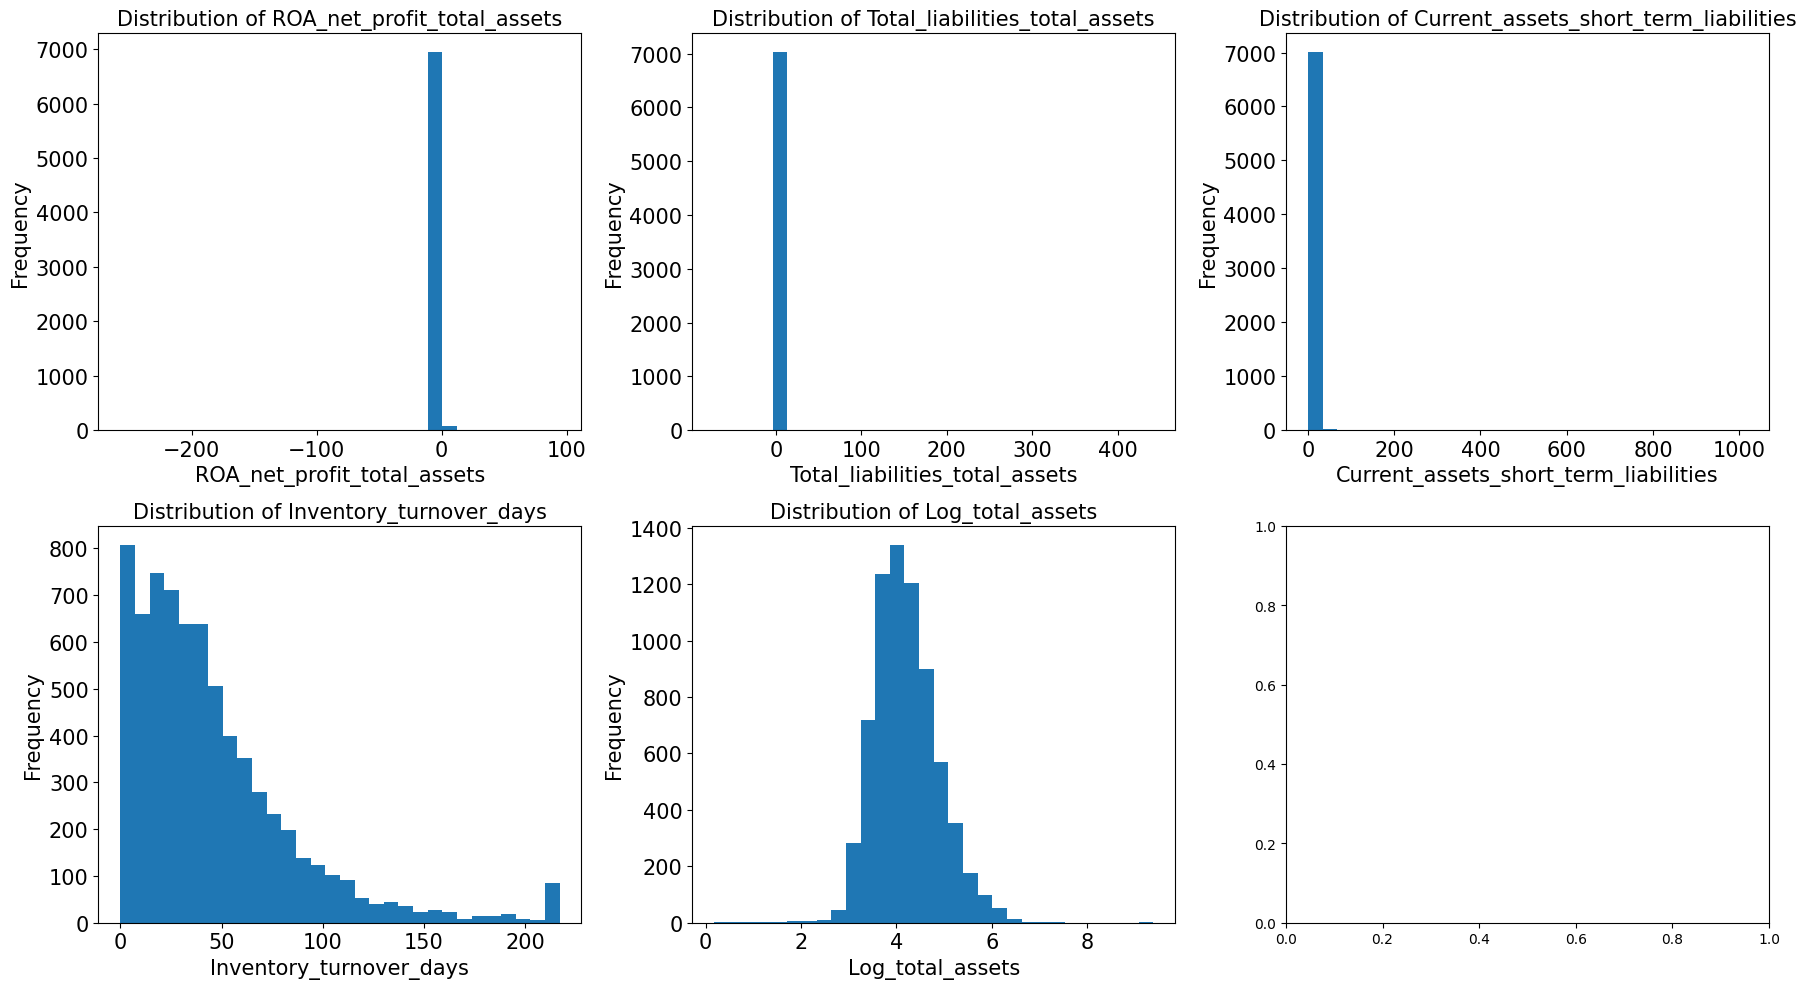

In [16]:
# Selected representative ratios for visualization
vars_to_plot = [
    "ROA_net_profit_total_assets",          # Profitability
    "Total_liabilities_total_assets",       # Leverage
    "Current_assets_short_term_liabilities",# Liquidity
    "Inventory_turnover_days",              # Efficiency
    "Log_total_assets"                      # Size
]

ncols = 3
nvars = len(vars_to_plot)
nrows = math.ceil(nvars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(vars_to_plot):
    ax = axes[i]

    ax.hist(df_imputed[col], bins=30)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel("Frequency", fontsize=15)
    ax.tick_params(axis="both", labelsize=15)

plt.tight_layout()
plt.show()

# Bivariate Analysis: Bankrupt vs Non-Bankrupt

/tmp/ipython-input-3515495991.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-3515495991.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-3515495991.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-3515495991.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/tmp/ipython-input-3515495991.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 

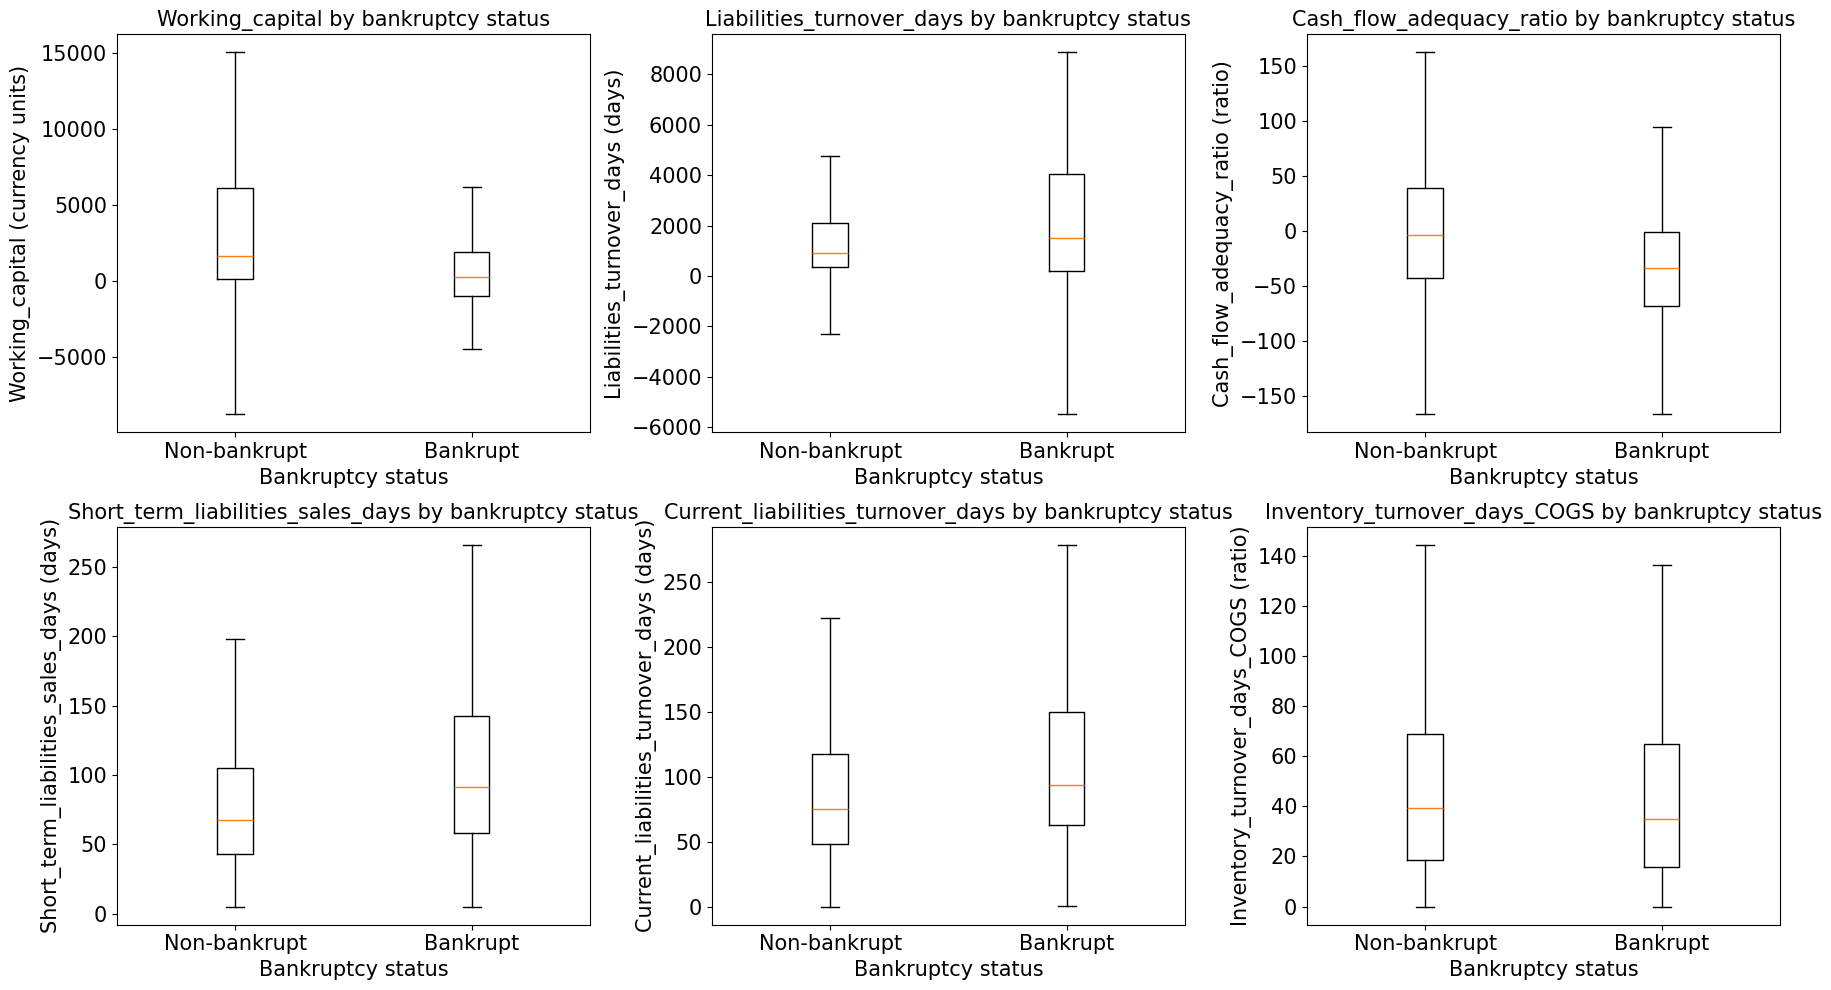

In [17]:
# Bivariate analysis highlights systematic differences between bankrupt and non-bankrupt firms prior to modeling.

# Define units for the y-axis
units = {
    # Monetary
    "Working_capital": "currency units",

    # Days-based
    "Liabilities_turnover_days": "days",
    "Current_liabilities_turnover_days": "days",
    "Short_term_liabilities_sales_days": "days",

    # Ratios (dimensionless)
    "Cash_flow_adequacy_ratio": "ratio",
    "Inventory_turnover_days_COGS": "ratio",
}

def y_label(var_name: str) -> str:
    """Return 'var (unit)'. If unit unknown, show '(unit not specified)' to be explicit."""
    unit = units.get(var_name, "unit not specified")
    return f"{var_name} ({unit})"

# Compute median differences between bankrupt and non-bankrupt firms
diff_table = []
feature_cols = [c for c in df_imputed.columns if c != "class"]

for col in feature_cols:
    med_0 = df_imputed.loc[df_imputed["class"] == 0, col].median()
    med_1 = df_imputed.loc[df_imputed["class"] == 1, col].median()
    diff_table.append((col, abs(med_0 - med_1)))

diff_df = (
    pd.DataFrame(diff_table, columns=["variable", "median_diff"])
    .sort_values("median_diff", ascending=False)
)

# Select top variables with largest differences
TOP_K = 6
vars_to_plot = diff_df.head(TOP_K)["variable"].tolist()

# Plot boxplots in a grid
ncols = 3
nvars = len(vars_to_plot)
nrows = math.ceil(nvars / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(vars_to_plot):
    ax = axes[i]

    data_0 = (
        df_imputed.loc[df_imputed["class"] == 0, col]
        .replace([np.inf, -np.inf], np.nan)
        .dropna()
    )
    data_1 = (
        df_imputed.loc[df_imputed["class"] == 1, col]
        .replace([np.inf, -np.inf], np.nan)
        .dropna()
    )

    ax.boxplot(
        [data_0, data_1],
        labels=["Non-bankrupt", "Bankrupt"],
        showfliers=False
    )

    ax.set_title(f"{col} by bankruptcy status", fontsize=15)
    ax.set_ylabel(y_label(col), fontsize=15)
    ax.set_xlabel("Bankruptcy status", fontsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)

plt.tight_layout()
plt.show()


# Correlation Analysis

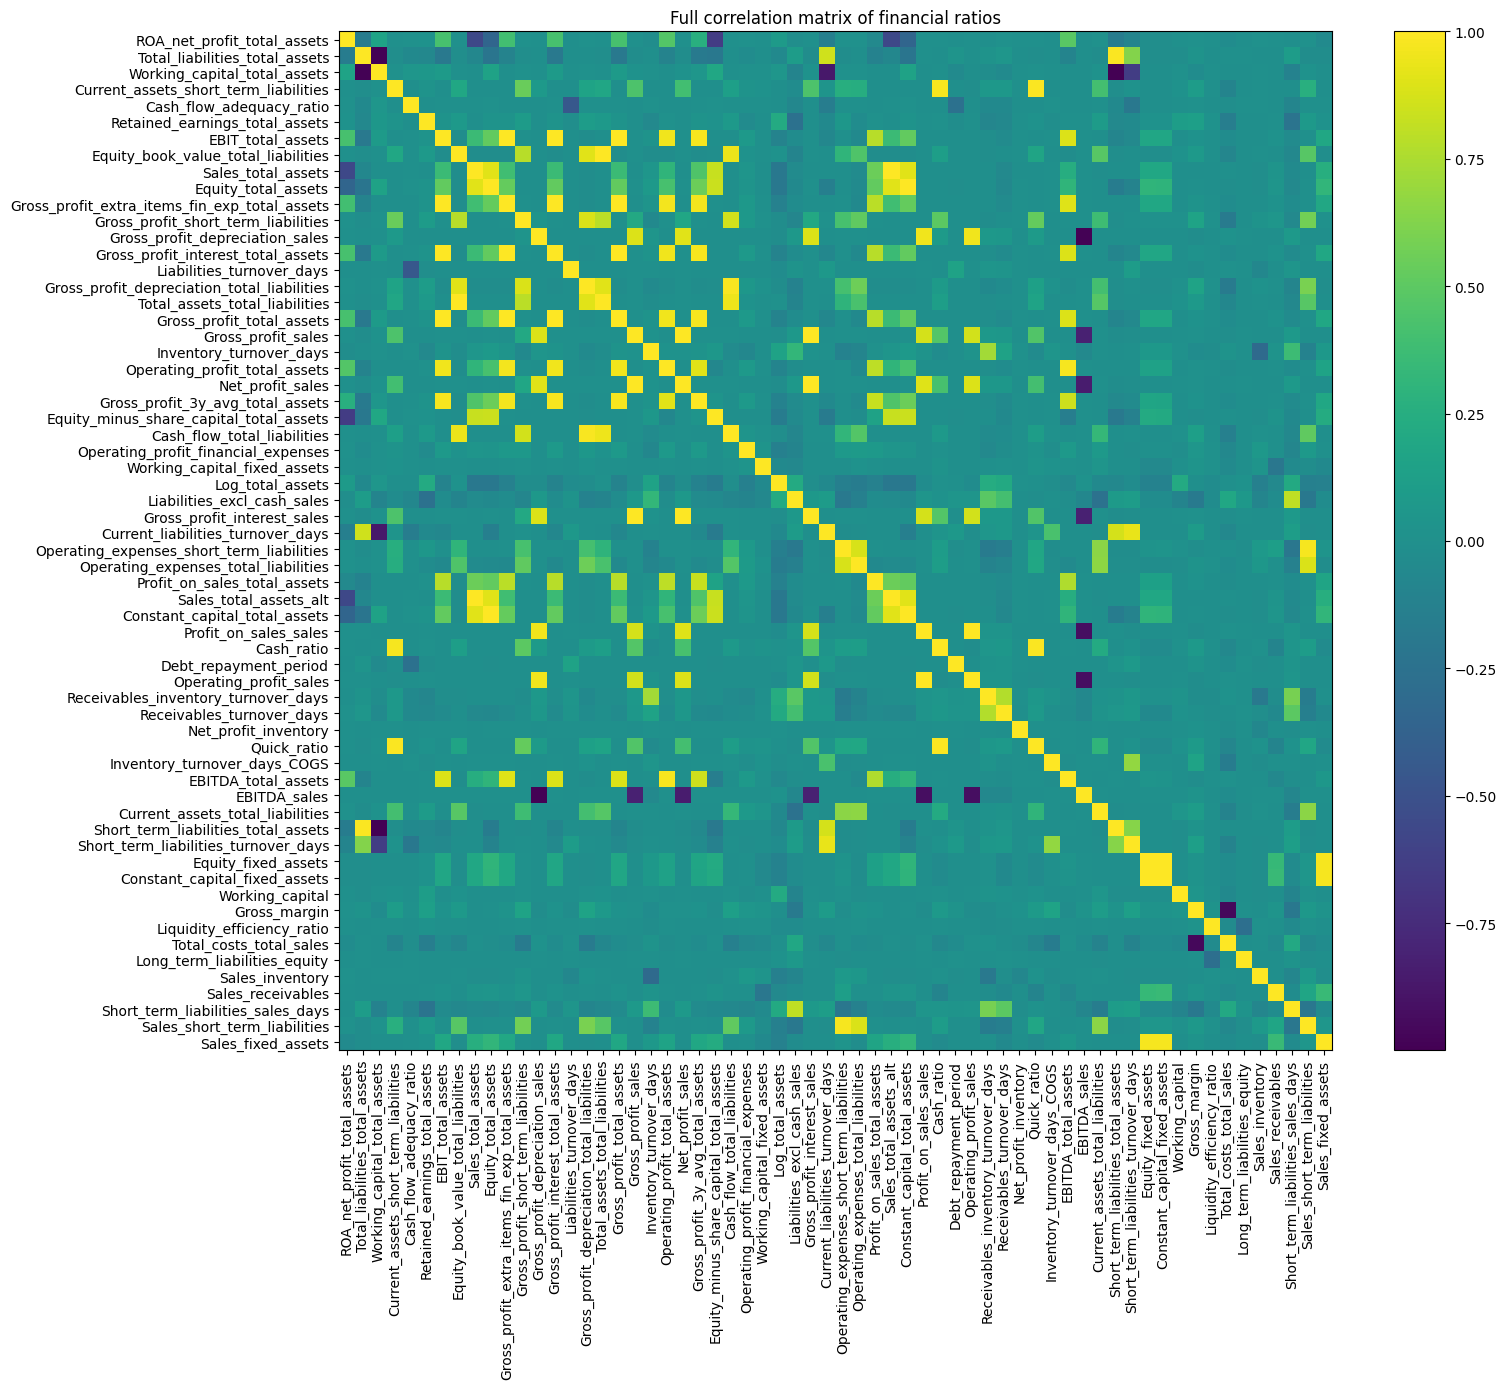

In [18]:
# Creat a correlation matrix to analyze relationship between variables
corr_full = df_imputed.drop(columns=["class"]).corr()

plt.figure(figsize=(16, 14))
plt.imshow(corr_full, aspect="auto")
plt.colorbar()

plt.xticks(
    ticks=range(len(corr_full.columns)),
    labels=corr_full.columns,
    rotation=90
)
plt.yticks(
    ticks=range(len(corr_full.columns)),
    labels=corr_full.columns
)

plt.title("Full correlation matrix of financial ratios")
plt.tight_layout()
plt.show()

In [19]:
# Convert correlation matrix to table
corr_table = (
    corr_full
    .where(np.triu(np.ones(corr_full.shape), k=1).astype(bool))  # remove duplicates & diagonal
    .stack()
    .reset_index()
)

corr_table.columns = ["Variable_1", "Variable_2", "Correlation"]

# Sort by absolute correlation
corr_table["abs_corr"] = corr_table["Correlation"].abs()
corr_table = corr_table.sort_values("abs_corr", ascending=False)

# Top positive and negative correlations
top_corr = corr_table.head(15)

top_corr

,Variable_1,Variable_2,Correlation,abs_corr
361,EBIT_total_assets,Gross_profit_total_assets,1.000000,1.000000
718,Gross_profit_interest_total_assets,Gross_profit_total_assets,1.000000,1.000000
357,EBIT_total_assets,Gross_profit_interest_total_assets,1.000000,1.000000
538,Equity_total_assets,Constant_capital_total_assets,0.999990,0.999990
955,Gross_profit_sales,Gross_profit_interest_sales,0.999987,0.999987
1825,Equity_fixed_assets,Constant_capital_fixed_assets,0.999917,0.999917
485,Sales_total_assets,Sales_total_assets_alt,0.999916,0.999916
1568,Profit_on_sales_sales,Operating_profit_sales,0.999870,0.999870
166,Working_capital_total_assets,Short_term_liabilities_total_assets,-0.999136,0.999136
947,Gross_profit_sales,Net_profit_sales,0.998123,0.998123


# Feature Scaling to [-1, 1]

In [20]:
# Scaling is required for neural networks and NN2Poly
scaler = MinMaxScaler(feature_range=(-1, 1))

X = df_imputed.drop(columns=["class"])
y = df_imputed["class"]

X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

# Check scaling range
X_scaled.describe().T[["min", "max"]].head()

,min,max
ROA_net_profit_total_assets,-1.0,1.0
Total_liabilities_total_assets,-1.0,1.0
Working_capital_total_assets,-1.0,1.0
Current_assets_short_term_liabilities,-1.0,1.0
Cash_flow_adequacy_ratio,-1.0,1.0


In [21]:
# Final preprocessed dataset
df_final = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
df_final.head()

,ROA_net_profit_total_assets,Total_liabilities_total_assets,Working_capital_total_assets,Current_assets_short_term_liabilities,Cash_flow_adequacy_ratio,Retained_earnings_total_assets,EBIT_total_assets,Equity_book_value_total_liabilities,Sales_total_assets,Equity_total_assets,...,Gross_margin,Liquidity_efficiency_ratio,Total_costs_total_sales,Long_term_liabilities_equity,Sales_inventory,Sales_receivables,Short_term_liabilities_sales_days,Sales_short_term_liabilities,Sales_fixed_assets,class
0,0.464194,-0.717552,0.997266,-0.995977,0.466271,0.453902,-0.409915,-0.820859,-0.999412,-0.427220,...,-0.323242,0.428681,0.335252,0.465633,-0.978267,-0.999513,-0.760325,-0.991526,-0.999950,0
1,0.464243,-0.717083,0.997609,-0.996179,0.466262,-0.053936,-0.409888,-0.821279,-0.999123,-0.427229,...,-0.324459,0.428785,0.288464,0.465624,-0.992039,-0.999690,-0.683967,-0.993475,-0.999586,0
2,0.464468,-0.716320,0.996680,-0.996945,0.466253,-0.053936,-0.409730,-0.821980,-0.999325,-0.427481,...,-0.103369,0.430584,0.125883,0.468729,-0.989321,-0.999626,-0.600720,-0.994783,-0.999965,0
3,0.463516,-0.717833,0.997548,-0.995102,0.466282,0.142110,-0.410403,-0.820187,-0.999455,-0.427131,...,-0.448592,0.427527,0.462200,0.465624,-0.990664,-0.999658,-0.748645,-0.991896,-0.999962,0
4,0.464119,-0.716642,0.996510,-0.997237,0.466250,0.191082,-0.410109,-0.821737,-0.999404,-0.427373,...,-0.299461,0.429076,0.311166,0.466180,-0.984778,-0.999591,-0.622552,-0.994494,-0.999946,0


# Save Processed Dataset

In [22]:
df_final.to_csv("polish_preprocessed.csv", index=False)